In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
country_data = {}
usa_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/usa.csv')
france_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/france.csv')
gbr_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/gbr.csv')
russia_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/russia.csv')
japan_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/japan.csv')
combined_data = pd.concat([usa_data, france_data, gbr_data, russia_data, japan_data], ignore_index=True)

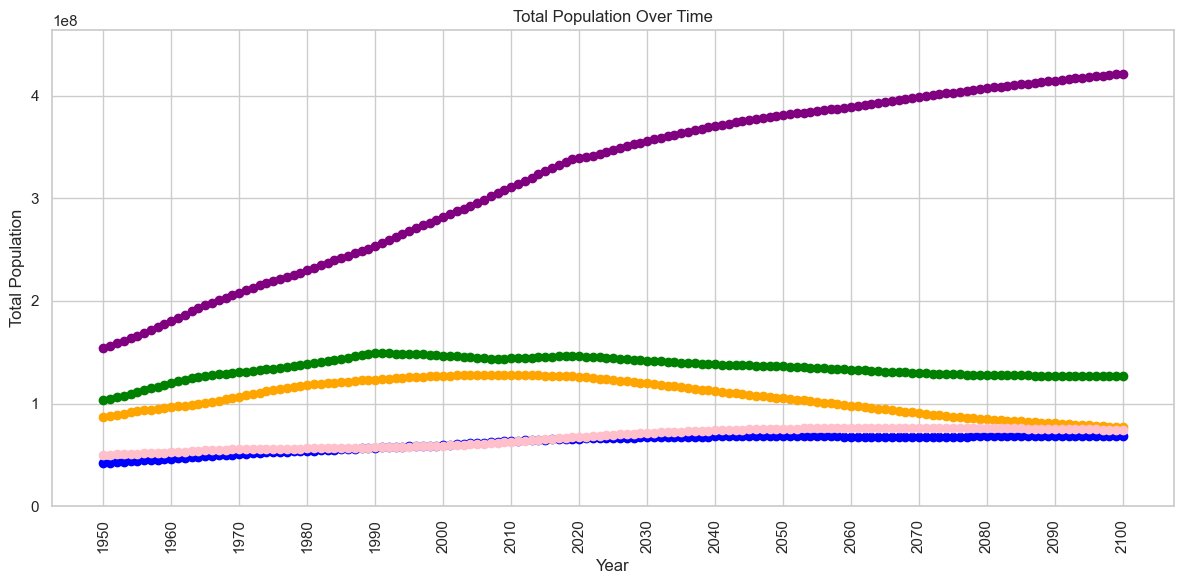

In [63]:
# Calculate total population by year for each country
france_population = france_data.groupby('year')['population'].sum().reset_index()
japan_population = japan_data.groupby('year')['population'].sum().reset_index()
russia_population = russia_data.groupby('year')['population'].sum().reset_index()
gbr_population = gbr_data.groupby('year')['population'].sum().reset_index()
usa_population = usa_data.groupby('year')['population'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))

# Plotting population
plt.plot(france_population['year'], france_population['population'], label='France', marker='o', color='blue')
plt.plot(japan_population['year'], japan_population['population'], label='Japan', marker='o', color='orange')
plt.plot(russia_population['year'], russia_population['population'], label='Russia', marker='o', color='green')
plt.plot(gbr_population['year'], gbr_population['population'], label='GBR', marker='o', color='pink')
plt.plot(usa_population['year'], usa_population['population'], label='USA', marker='o', color='purple')

# Customize plot
plt.title('Total Population Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True)

# Set y-axis limits to make sure the line is visible
plt.ylim(0, max(france_population['population'].max(), japan_population['population'].max(), 
                 russia_population['population'].max(), gbr_population['population'].max(),
                 usa_population['population'].max()) * 1.1)

# Set x-ticks to show every 10 years
years = sorted(set(france_population['year']).union(set(japan_population['year'])).union(set(russia_population['year'])).union(set(gbr_population['year'])).union(set(usa_population['year'])))
plt.xticks([year for year in years if year % 10 == 0], rotation=90)  
plt.tight_layout()

plt.show()

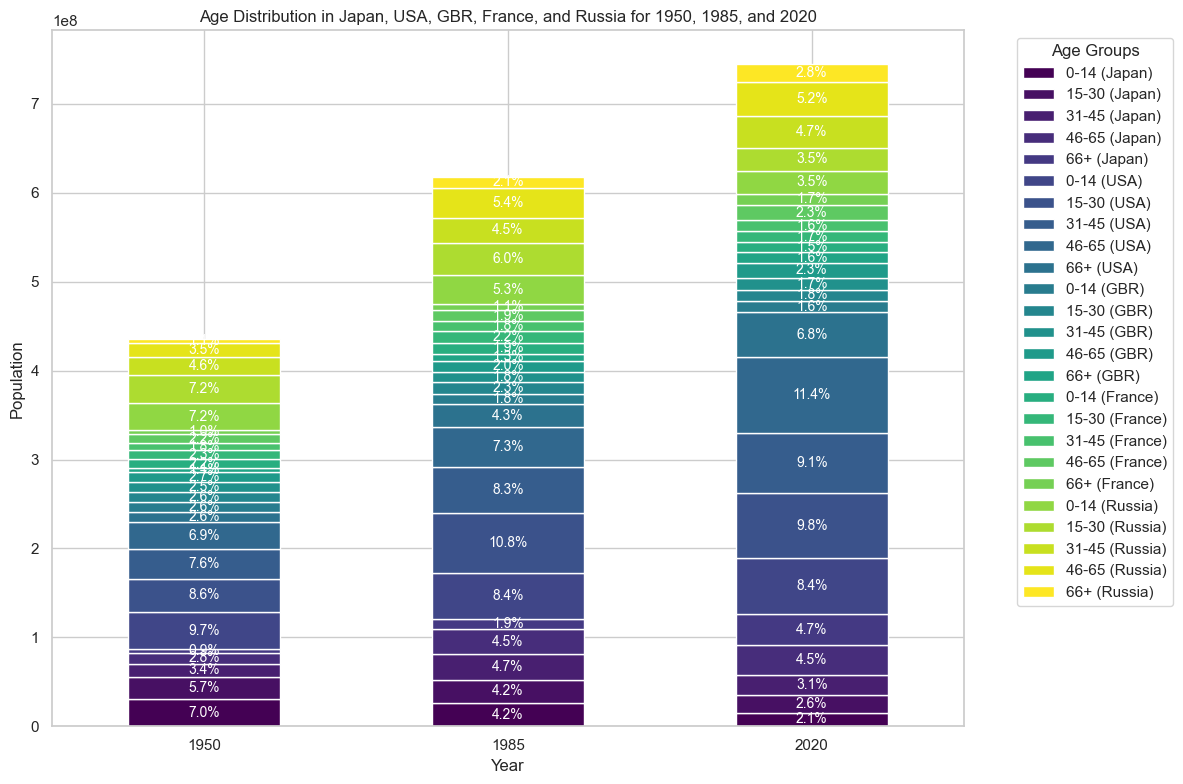

In [64]:
def categorize_age(age):
    if age <= 14:
        return '0-14'
    elif age <= 30:
        return '15-30'
    elif age <= 45:
        return '31-45'
    elif age <= 65:
        return '46-65'
    else:
        return '66+'

japan_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/japan.csv')
usa_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/usa.csv')
gbr_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/gbr.csv')
france_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/france.csv')
russia_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/russia.csv')

# Filter for the years 1950, 1985, and 2020 for all countries
years_of_interest = [1950, 1985, 2020]
japan_filtered = japan_data[japan_data['year'].isin(years_of_interest)].copy()
usa_filtered = usa_data[usa_data['year'].isin(years_of_interest)].copy()
gbr_filtered = gbr_data[gbr_data['year'].isin(years_of_interest)].copy()
france_filtered = france_data[france_data['year'].isin(years_of_interest)].copy()
russia_filtered = russia_data[russia_data['year'].isin(years_of_interest)].copy()

# Ensure 'age' is numeric and categorize ages for all countries
for df in [japan_filtered, usa_filtered, gbr_filtered, france_filtered, russia_filtered]:
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['age_group'] = df['age'].apply(categorize_age)
    df.dropna(subset=['age_group'], inplace=True)

# Calculate the population for each age group for all countries
japan_distribution = japan_filtered.groupby(['year', 'age_group'])['population'].sum().unstack(fill_value=0)
usa_distribution = usa_filtered.groupby(['year', 'age_group'])['population'].sum().unstack(fill_value=0)
gbr_distribution = gbr_filtered.groupby(['year', 'age_group'])['population'].sum().unstack(fill_value=0)
france_distribution = france_filtered.groupby(['year', 'age_group'])['population'].sum().unstack(fill_value=0)
russia_distribution = russia_filtered.groupby(['year', 'age_group'])['population'].sum().unstack(fill_value=0)

# Combine the five distributions
combined_distribution = pd.concat(
    [japan_distribution.add_suffix(' (Japan)'), 
     usa_distribution.add_suffix(' (USA)'), 
     gbr_distribution.add_suffix(' (GBR)'), 
     france_distribution.add_suffix(' (France)'), 
     russia_distribution.add_suffix(' (Russia)')], 
    axis=1
)

# Reindex to ensure years are in the correct order
combined_distribution = combined_distribution.reindex(years_of_interest)

# Create a stacked bar chart
ax = combined_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Customize plot
plt.title('Age Distribution in Japan, USA, GBR, France, and Russia for 1950, 1985, and 2020')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate percentages
for i in range(len(combined_distribution)):
    for j, age_group in enumerate(combined_distribution.columns):
        total = combined_distribution.iloc[i].sum()
        if total > 0:  # Avoid division by zero
            percentage = (combined_distribution.iloc[i][age_group] / total) * 100
            ax.text(i, combined_distribution.iloc[i].cumsum()[age_group] - (combined_distribution.iloc[i][age_group] / 2),
                    f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.xticks(rotation=0)  
plt.tight_layout()

plt.show()

C:\Users\mihir\AppData\Local\Temp\ipykernel_25124\615085695.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = pd.DataFrame(index=country_names, columns=age_groups).fillna(0)


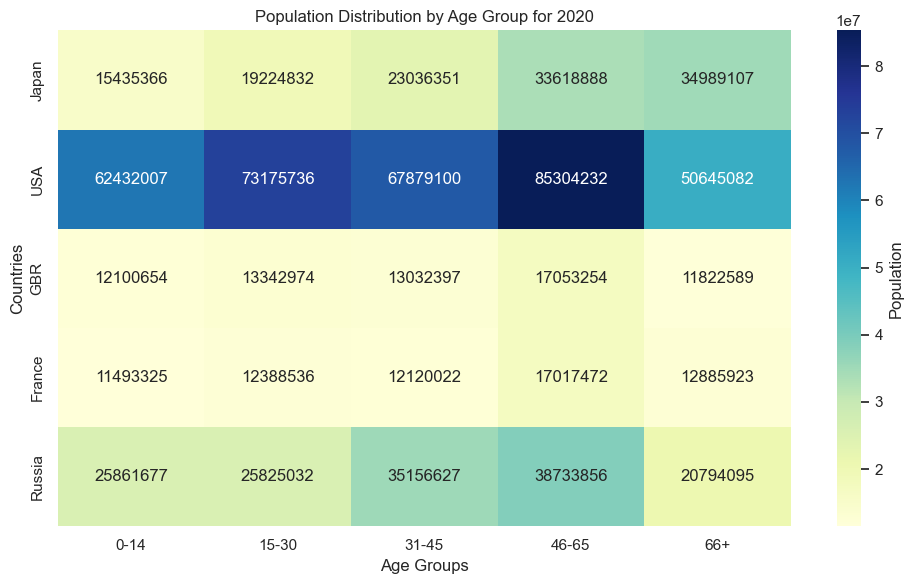

In [65]:
# Part 2: Seaborn
def categorize_age(age):
    if age <= 14:
        return '0-14'
    elif age <= 30:
        return '15-30'
    elif age <= 45:
        return '31-45'
    elif age <= 65:
        return '46-65'
    else:
        return '66+'
    
japan_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/japan.csv')
usa_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/usa.csv')
gbr_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/gbr.csv')
france_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/france.csv')
russia_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/russia.csv')

# Combine 2020 data
year_of_interest = 2020
countries_data = [japan_data, usa_data, gbr_data, france_data, russia_data]
country_names = ['Japan', 'USA', 'GBR', 'France', 'Russia']

# Filter and categorize data
age_groups = ['0-14', '15-30', '31-45', '46-65', '66+']
heatmap_data = pd.DataFrame(index=country_names, columns=age_groups).fillna(0)

for country_data, country_name in zip(countries_data, country_names):
    filtered_data = country_data[country_data['year'] == year_of_interest].copy()
    filtered_data['age'] = pd.to_numeric(filtered_data['age'], errors='coerce')
    filtered_data['age_group'] = filtered_data['age'].apply(categorize_age)
    filtered_data.dropna(subset=['age_group'], inplace=True)

    age_distribution = filtered_data.groupby('age_group')['population'].sum()
    heatmap_data.loc[country_name] = age_distribution

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Population'})

# Customize plot
plt.title(f'Population Distribution by Age Group for 2020')
plt.xlabel('Age Groups')
plt.ylabel('Countries')
plt.tight_layout()

plt.show()
# Explanation: the heatmap shows a visual representation of the population distribution across the 5 countries. The legend shows a darker blue color for larger population values and lighter yellow/green for smaller population sizes.
# From the heatmap, USA has a larger population of ages 46-65 in 2020, while GBR and France have lighter colors indicating smaller populations across the age groups. This visualization is an easy method to show demographic structure.

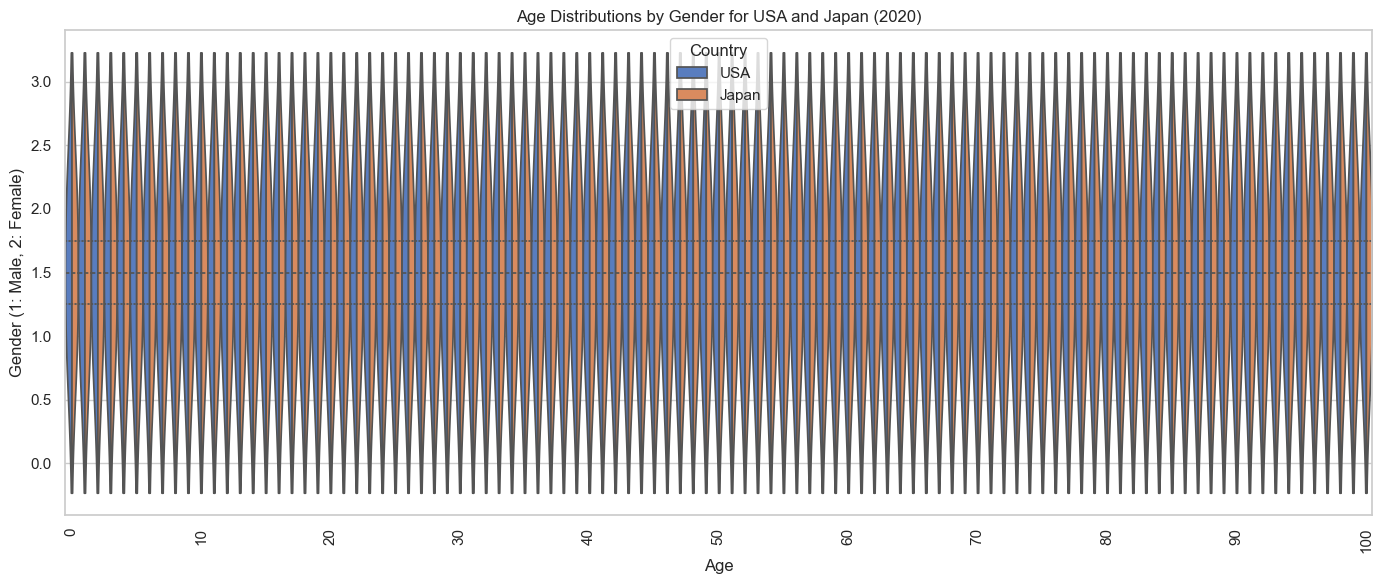

In [66]:
# Violin plots
usa_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/usa.csv')
japan_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/japan.csv')

# Filter year 2020
usa_2020 = usa_data[usa_data['year'] == 2020].copy() 
japan_2020 = japan_data[japan_data['year'] == 2020].copy()

usa_2020.loc[:, 'country'] = 'USA'  
japan_2020.loc[:, 'country'] = 'Japan'

combined_data = pd.concat([usa_2020, japan_2020], ignore_index=True)

# Create age groups
combined_data['age'] = pd.to_numeric(combined_data['age'], errors='coerce')
combined_data.dropna(subset=['age'], inplace=True)

# Create violin plot
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
sns.violinplot(x='age', y='gender', hue='country', data=combined_data, split=True, inner='quartile', palette='muted', width=1)

# Customize plot
plt.title('Age Distributions by Gender for USA and Japan (2020)')
plt.xlabel('Age')
plt.ylabel('Gender (1: Male, 2: Female)')
plt.xticks(ticks=range(0, 101, 10), rotation=90)
plt.legend(title='Country')
plt.tight_layout()

plt.show()
# The violin plot compares the age distribution between USA and Japan in 2020 separated by gender. The white dot represents the median, the gray line is the interquartile range.
# The wider sections indicate a higher probability that people in that population will have that value and a thin section indicates the opposite. 

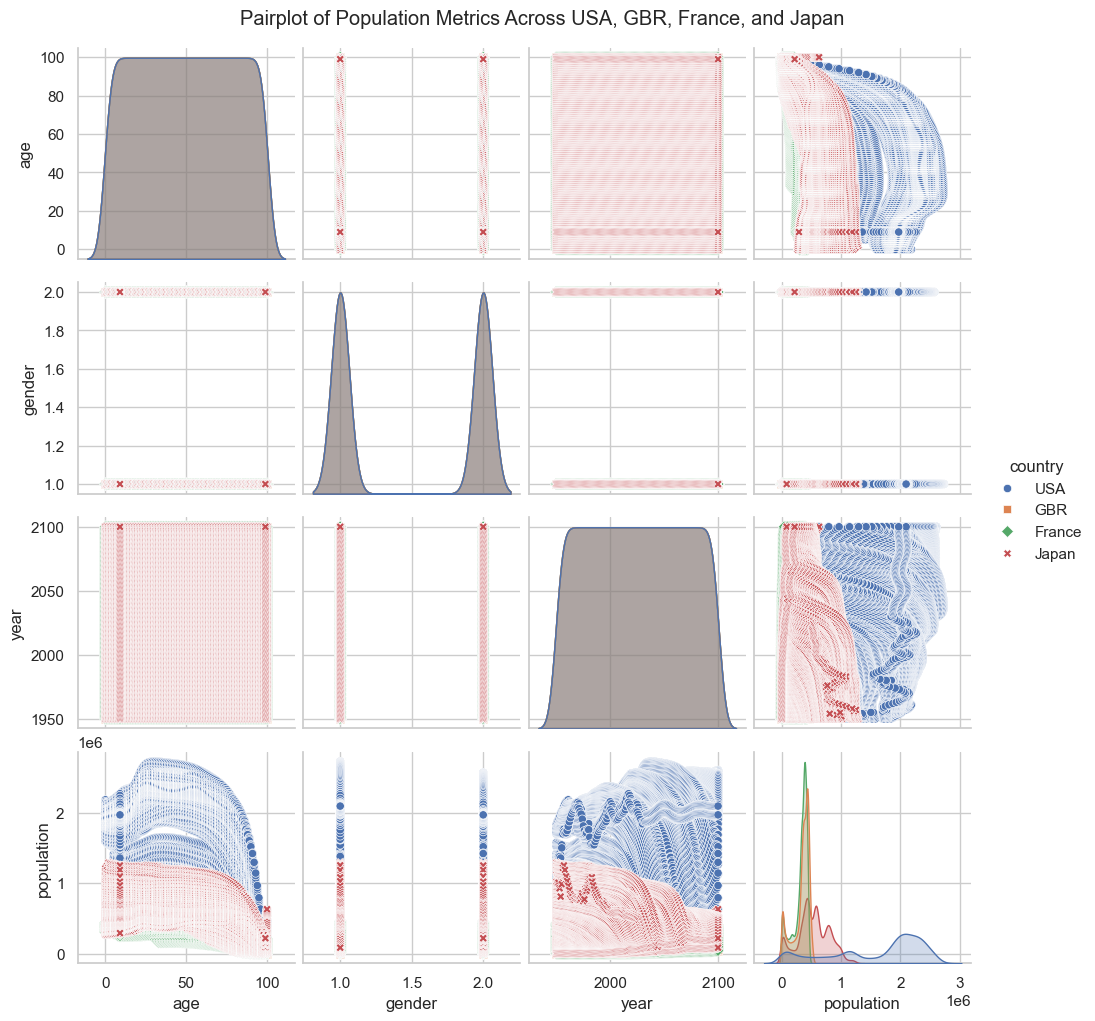

In [67]:
# Pairplot 
usa_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/usa.csv')
japan_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/japan.csv')
gbr_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/gbr.csv')
france_data = pd.read_csv('C:/Users/mihir/OneDrive/Desktop/france.csv')

usa_data['country'] = 'USA'
gbr_data['country'] = 'GBR'
france_data['country'] = 'France'
japan_data['country'] = 'Japan'

combined_data = pd.concat([usa_data, gbr_data, france_data, japan_data], ignore_index=True)

# Select columns 
selected_columns = ['age', 'gender', 'year', 'population', 'country']
filtered_data = combined_data[selected_columns]

# Create pairplot
sns.set(style='whitegrid')
pairplot = sns.pairplot(filtered_data, hue='country', diag_kind='kde', markers=["o", "s", "D", "X"])
pairplot.fig.suptitle('Pairplot of Population Metrics Across USA, GBR, France, and Japan', y=1.02)

plt.show()
# Pairplots allow for a visualization of the relationship between variables in the dataset and they help in creating an exploratory data analysis.
# For example, in age, we see that USA has a higher concentration of people in older age categories compared to France, and GBR which are lower on the plot.
# For population, USA is shown to have a larger population compared to the narrow France and GBR category which are skewed to the left.  